<a href="https://colab.research.google.com/github/mallunaruto/MAR-523/blob/main/Practical1_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATA INTO PANDAS

In [117]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92


Saving SBE.xlsx to SBE (5).xlsx


THE IMPORTANT STEP

In [118]:
import io
s=pd.read_excel(io.BytesIO(uploaded["SBE.xlsx"]))

# REFERENCE: 

# To upload from your local drive, start with the following code:

# from google.colab import files
# uploaded = files.upload()

# It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).

# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

# Dataset is now stored in a Pandas Dataframe 


PLOTING THE GRAPH

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
s.info() # to understand what kind of value are saved in the data frame, see here we need to convert time object to datetime[64] only then we can do a graph

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      21598 non-null  datetime64[ns]
 1   Time      21598 non-null  object        
 2   Depth(m)  21598 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 506.3+ KB


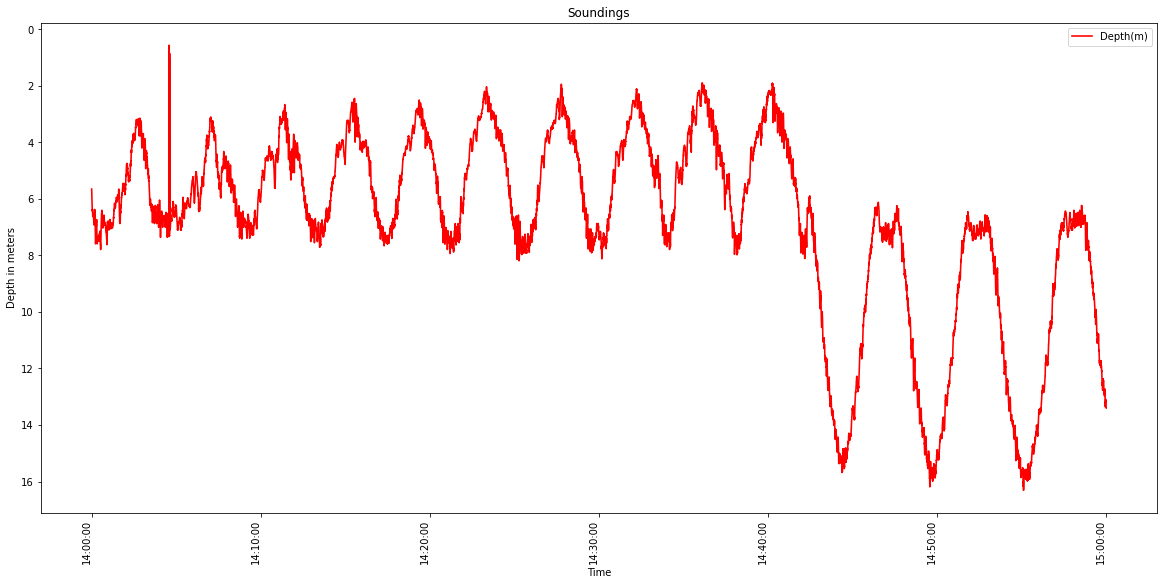

In [120]:
import matplotlib.dates as mdates  #WHEN IT COMES TO MAKE A GRAPH AGAINST THE DATES WE NEED THIS

s['Time']=pd.to_datetime(s['Time']) #WE NEED THIS LINE TO CONVERT THE TIme to datetime64 then only the operations could be done,as the graph cannot be made from the type object

ax = s.plot(x ="Time" , y="Depth(m)" , kind="line" ,figsize=[20, 10], linewidth=1.6, alpha=1, color="r")  
# ax = s.plot(x axis variable name,y axis variable name, kind =scatter,line,figsize=[l b],linewidth= ,alpha=1 (tells us the transparency),color='')

timeFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(timeFmt)
plt.ylabel("Depth in meters")
plt.title("Soundings")
plt.xticks(rotation=90)
ax.invert_yaxis()
plt.show()

#need to work on matplotlib skills

#the following materials helped to reach the conclution

#https://www.bing.com/videos/search?q=how+to+extract+time+froma+column+using+pandas&docid=608053999371563191&mid=D3B7E218B1D56857BA69D3B7E218B1D56857BA69&view=detail&FORM=VIRE

# import pandas as pd
# import numpy as np
# from matplotlib import pyplot as plt
# import matplotlib.dates as mdates

# date_merge = pd.DataFrame(
# [['2020-01-01 00:32:00' ,23.3],
# ['2020-01-01 00:34:00'      ,23.3],
# ['2020-01-01 00:37:00'      ,np.nan],
# ['2020-01-01 00:38:00'      ,np.nan],
# ['2020-01-01 00:39:00'      ,np.nan],
# ['2020-01-01 23:59:00'      ,23.9]],
# columns = ['longtime'       ,'value'])

# date_merge["longtime"] = pd.to_datetime(date_merge["longtime"])

# ax = date_merge.plot(x ="longtime" , y="value" , kind="scatter" ,figsize=[15, 5], linewidth=0.1, alpha=0.6, color="#003399")

# timeFmt = mdates.DateFormatter('%H:%M:%S')
# ax.xaxis.set_major_formatter(timeFmt)
# plt.xticks(rotation=90)
# plt.show()

GPS DATA

In [121]:
from google.colab import files
uploaded= files.upload()
g=pd.read_excel(io.BytesIO(uploaded['GPS36.xlsx']))

Saving GPS36.xlsx to GPS36 (4).xlsx


PLOTTING THE BOAT TRACK

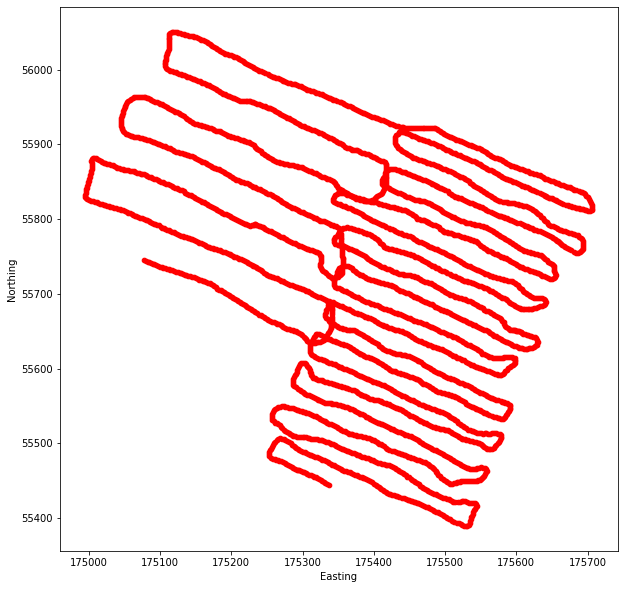

In [122]:
g['Time']=pd.to_datetime(g['Time']) # THE SAME LOGIC
ax= g.plot(x='Easting',y='Northing',kind="scatter",figsize=[10,10],linewidth=1.2,alpha=1,color='r')
plt.show()

PLOTTING THE TIDAL DATA

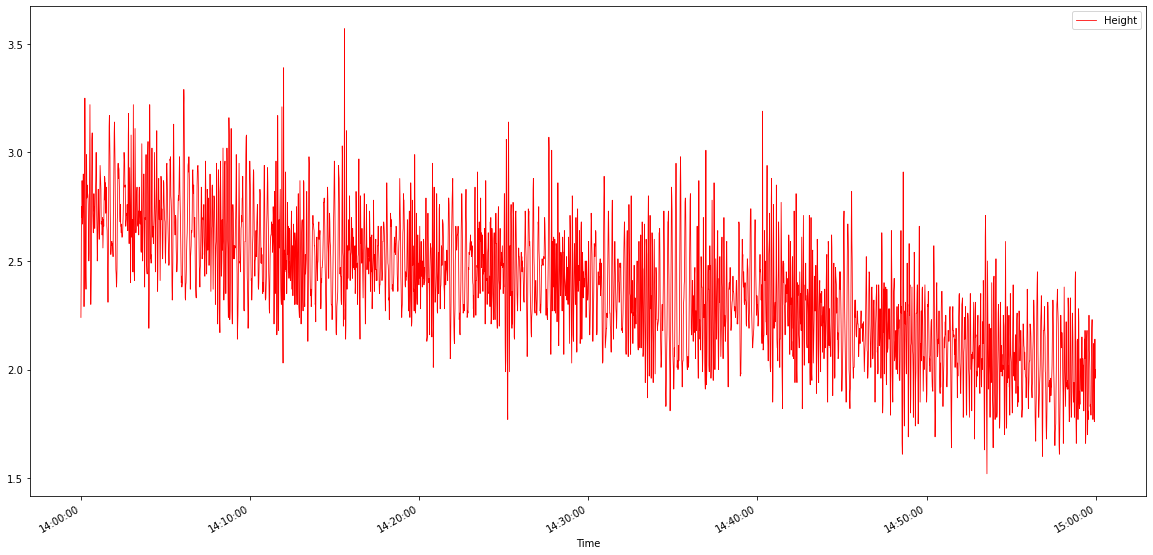

In [123]:
from IPython.core.pylabtools import figsize
ax=g.plot(x='Time',y='Height',kind="line",figsize=[20,10],linewidth=0.8,alpha=1,color='r')
timeFmt = mdates.DateFormatter('%H:%M:%S') #IF THIS LINE IS NOT THERE IT WILL PRINT TODAYS DATE WITH THE TIME SO KEEP THIS LINE
ax.xaxis.set_major_formatter(timeFmt)


In [124]:
g.shape #dont confuse it with the shape function in array no brackets for this


(3597, 5)

COMBINING DATA SETS

In [125]:
 # cheatography
 S=pd.merge(s,g,how='left',on=['Date','Time'])
 print(S.iloc[:30])
 #the inner kept only the data and eliminated the missing ones 
 #outer kept all values
#left soted the values based on the left most column and kept all values
#right sorts the value based on the right column and eliminates the rest


         Date                    Time  Depth(m)    Easting  Northing  Height
0  2012-01-17 2022-02-21 14:00:00.000      5.65  175337.29  55444.62    2.24
1  2012-01-17 2022-02-21 14:00:00.167      5.70        NaN       NaN     NaN
2  2012-01-17 2022-02-21 14:00:00.333      5.79        NaN       NaN     NaN
3  2012-01-17 2022-02-21 14:00:00.500      5.82        NaN       NaN     NaN
4  2012-01-17 2022-02-21 14:00:00.667      5.87        NaN       NaN     NaN
5  2012-01-17 2022-02-21 14:00:00.833      5.95        NaN       NaN     NaN
6  2012-01-17 2022-02-21 14:00:01.000      6.00  175334.71  55445.95    2.45
7  2012-01-17 2022-02-21 14:00:01.167      6.09        NaN       NaN     NaN
8  2012-01-17 2022-02-21 14:00:01.333      6.18        NaN       NaN     NaN
9  2012-01-17 2022-02-21 14:00:01.500      6.23        NaN       NaN     NaN
10 2012-01-17 2022-02-21 14:00:01.667      6.29        NaN       NaN     NaN
11 2012-01-17 2022-02-21 14:00:01.833      6.37        NaN       NaN     NaN

INTERPOLATION STEPS STARTS HERE

In [126]:
#S.drop('diff',inplace=True,axis=1)  # see here we used inplace and axis then only it was removed effectively
#for finding the difference we could use .diff() but the problem is that it it returns a value that basocally we cant do any operations in it.
S['Time Difference']=S['Time'].dt.microsecond/1000000
S['Time Difference']
# here i use the logic that during the interpolation these values are coming up so why cant we just use the micro seconds that the difference keep repeating
#if we wanted to find the differece between the
# S['diff']=S['Time Difference'].diff()


0        0.000
1        0.167
2        0.333
3        0.500
4        0.667
         ...  
21593    0.000
21594    0.200
21595    0.400
21596    0.600
21597    0.800
Name: Time Difference, Length: 21598, dtype: float64

In [127]:
S['pcal_east']=S['Easting']
S['ncal_east']= S['Easting'] 
S['pcal_east'].fillna(method='ffill',inplace=True) #need to give the method and value to inplace if the value of inplace is not set to True then it will not fill the NaN places
#now we need to subtract the next value for interpolation purposes so we need to use the backfill or bfill
S['ncal_east'].fillna(method='bfill',inplace=True)

# WE ARE APPLYING THE SAME LOGIC IN NORTHING

S['pcal_north']=S['Northing']
S['ncal_north']= S['Northing'] 
S['pcal_north'].fillna(method='ffill',inplace=True)
S['ncal_north'].fillna(method='bfill',inplace=True)
S.iloc[:30]

,Date,Time,Depth(m),Easting,Northing,Height,Time Difference,pcal_east,ncal_east,pcal_north,ncal_north
0,2012-01-17,2022-02-21 14:00:00.000,5.65,175337.29,55444.62,2.24,0.000,175337.29,175337.29,55444.62,55444.62
1,2012-01-17,2022-02-21 14:00:00.167,5.70,NaN,NaN,NaN,0.167,175337.29,175334.71,55444.62,55445.95
2,2012-01-17,2022-02-21 14:00:00.333,5.79,NaN,NaN,NaN,0.333,175337.29,175334.71,55444.62,55445.95
3,2012-01-17,2022-02-21 14:00:00.500,5.82,NaN,NaN,NaN,0.500,175337.29,175334.71,55444.62,55445.95
4,2012-01-17,2022-02-21 14:00:00.667,5.87,NaN,NaN,NaN,0.667,175337.29,175334.71,55444.62,55445.95
5,2012-01-17,2022-02-21 14:00:00.833,5.95,NaN,NaN,NaN,0.833,175337.29,175334.71,55444.62,55445.95
6,2012-01-17,2022-02-21 14:00:01.000,6.00,175334.71,55445.95,2.45,0.000,175334.71,175334.71,55445.95,55445.95
7,2012-01-17,2022-02-21 14:00:01.167,6.09,NaN,NaN,NaN,0.167,175334.71,175332.13,55445.95,55447.29
8,2012-01-17,2022-02-21 14:00:01.333,6.18,NaN,NaN,NaN,0.333,175334.71,175332.13,55445.95,55447.29
9,2012-01-17,2022-02-21 14:00:01.500,6.23,NaN,NaN,NaN,0.500,175334.71,175332.13,55445.95,55447.29


MAIN STEPS IN INTERPOLATION

difference of the easting * time difference should give you the interpolated value+ the previous value(logically the mallest value)

In [128]:
S['ediff']= -S['ncal_east']+S['pcal_east']
S['ndiff']=S['ncal_north']-S['pcal_north']
S['inter_east']=S['ediff']*S['Time Difference']+S['ncal_east']
S['inter_north']=S['ndiff']*S['Time Difference']+S['pcal_north']
S.iloc[:30]

,Date,Time,Depth(m),Easting,Northing,Height,Time Difference,pcal_east,ncal_east,pcal_north,ncal_north,ediff,ndiff,inter_east,inter_north
0,2012-01-17,2022-02-21 14:00:00.000,5.65,175337.29,55444.62,2.24,0.000,175337.29,175337.29,55444.62,55444.62,0.00,0.00,175337.29000,55444.62000
1,2012-01-17,2022-02-21 14:00:00.167,5.70,NaN,NaN,NaN,0.167,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175335.14086,55444.84211
2,2012-01-17,2022-02-21 14:00:00.333,5.79,NaN,NaN,NaN,0.333,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175335.56914,55445.06289
3,2012-01-17,2022-02-21 14:00:00.500,5.82,NaN,NaN,NaN,0.500,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175336.00000,55445.28500
4,2012-01-17,2022-02-21 14:00:00.667,5.87,NaN,NaN,NaN,0.667,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175336.43086,55445.50711
5,2012-01-17,2022-02-21 14:00:00.833,5.95,NaN,NaN,NaN,0.833,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175336.85914,55445.72789
6,2012-01-17,2022-02-21 14:00:01.000,6.00,175334.71,55445.95,2.45,0.000,175334.71,175334.71,55445.95,55445.95,0.00,0.00,175334.71000,55445.95000
7,2012-01-17,2022-02-21 14:00:01.167,6.09,NaN,NaN,NaN,0.167,175334.71,175332.13,55445.95,55447.29,2.58,1.34,175332.56086,55446.17378
8,2012-01-17,2022-02-21 14:00:01.333,6.18,NaN,NaN,NaN,0.333,175334.71,175332.13,55445.95,55447.29,2.58,1.34,175332.98914,55446.39622
9,2012-01-17,2022-02-21 14:00:01.500,6.23,NaN,NaN,NaN,0.500,175334.71,175332.13,55445.95,55447.29,2.58,1.34,175333.42000,55446.62000


FILLING THE NORTHING AND EASTING WITH THE INTERPOLATED VALUE

In [129]:
S['Easting'].fillna(S['inter_east'],inplace=True)
S['Northing'].fillna(S['inter_north'],inplace=True)
S.iloc[:30]

,Date,Time,Depth(m),Easting,Northing,Height,Time Difference,pcal_east,ncal_east,pcal_north,ncal_north,ediff,ndiff,inter_east,inter_north
0,2012-01-17,2022-02-21 14:00:00.000,5.65,175337.29000,55444.62000,2.24,0.000,175337.29,175337.29,55444.62,55444.62,0.00,0.00,175337.29000,55444.62000
1,2012-01-17,2022-02-21 14:00:00.167,5.70,175335.14086,55444.84211,NaN,0.167,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175335.14086,55444.84211
2,2012-01-17,2022-02-21 14:00:00.333,5.79,175335.56914,55445.06289,NaN,0.333,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175335.56914,55445.06289
3,2012-01-17,2022-02-21 14:00:00.500,5.82,175336.00000,55445.28500,NaN,0.500,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175336.00000,55445.28500
4,2012-01-17,2022-02-21 14:00:00.667,5.87,175336.43086,55445.50711,NaN,0.667,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175336.43086,55445.50711
5,2012-01-17,2022-02-21 14:00:00.833,5.95,175336.85914,55445.72789,NaN,0.833,175337.29,175334.71,55444.62,55445.95,2.58,1.33,175336.85914,55445.72789
6,2012-01-17,2022-02-21 14:00:01.000,6.00,175334.71000,55445.95000,2.45,0.000,175334.71,175334.71,55445.95,55445.95,0.00,0.00,175334.71000,55445.95000
7,2012-01-17,2022-02-21 14:00:01.167,6.09,175332.56086,55446.17378,NaN,0.167,175334.71,175332.13,55445.95,55447.29,2.58,1.34,175332.56086,55446.17378
8,2012-01-17,2022-02-21 14:00:01.333,6.18,175332.98914,55446.39622,NaN,0.333,175334.71,175332.13,55445.95,55447.29,2.58,1.34,175332.98914,55446.39622
9,2012-01-17,2022-02-21 14:00:01.500,6.23,175333.42000,55446.62000,NaN,0.500,175334.71,175332.13,55445.95,55447.29,2.58,1.34,175333.42000,55446.62000


In [130]:
S.shape

(21598, 15)

DROPING THE UNWANTED COLUMNS AND KEEPING ONLY THE NECCESSARY ONE

In [ ]:
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

S.drop(S.iloc[:,5:15],inplace=True,axis=1)
S.iloc[:50]

PLOTTING THE SURFACE

ValueError: ignored

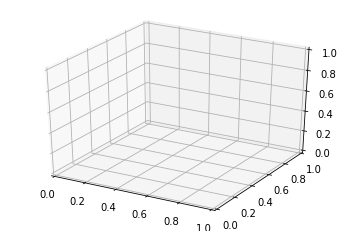

In [150]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
#create 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot3D(S['Easting'],S['Northing'],S['Depth(m)'])
# ax.view_init(20,50)
# ax.invert_zaxis()

 
# #set title
# ax.set_title('BATHYMETRIC SURFACE') 

ax.plot_surface(S['Easting'],S['Northing'],S['Depth(m)'],rstride=1,cstride=1,cmap='viridis')


 
plt.show()